# Your first Recurrent Neural Network (RNN)

## Imports

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Normalization, Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

🙌 Welcome to RNNs! After using CNNs in the previous lesson to deal with images (spatial data), you are going to deal with time-related data (***temporal data***).

🎯 Goals of this warm-up challenge:

1. Understand what temporal data is
2. Build your first Recurrent Neural Networks



## 📚 The dataset

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')

In [3]:
X.shape, y.shape

((25000, 10, 3), (25000,))

☝️ The dataset describes the evolution of the **employment status of 25 000 employees, year after year**: each sequence corresponds to 10 consecutive years, where each year describes a job situation, comprising 3 components
- the salary,
- the number of people under someone's responsibility,
- the size of the company. 

In [4]:
employee_0 = pd.DataFrame(X[0], columns=['salary', 'responsibility', 'company_size'])
round(employee_0,2)

,salary,responsibility,company_size
0,0.80,10.73,102.0
1,0.50,10.73,102.0
2,0.60,10.73,102.0
3,0.71,10.73,130.0
4,0.94,10.73,130.0
5,1.05,10.73,130.0
6,1.12,32.00,108.0
7,4.87,32.00,108.0
8,4.97,33.00,108.0
9,5.20,39.00,108.0


📈 Visually detect some correlations between these three variables

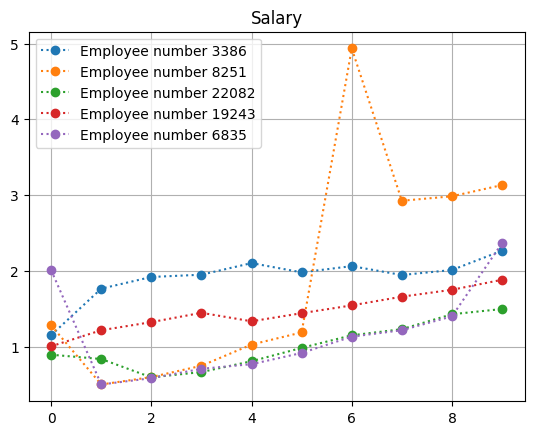

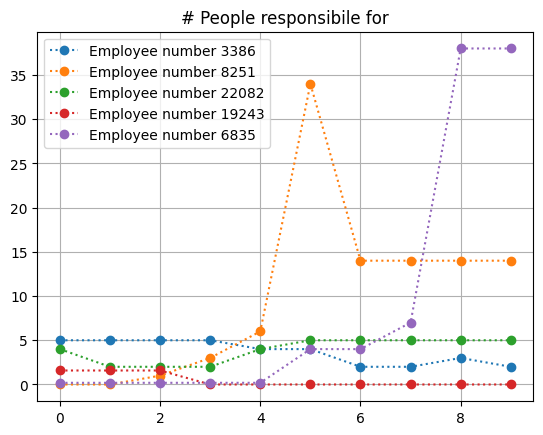

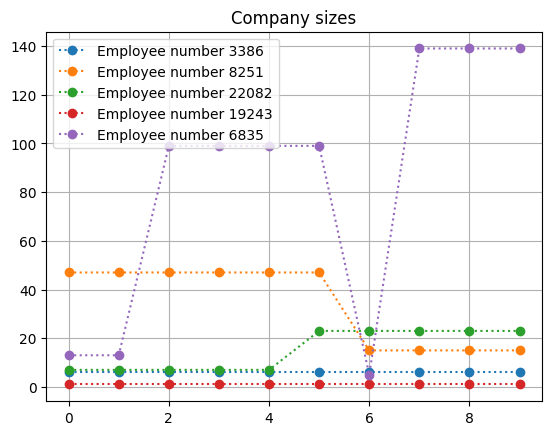

In [6]:
number_of_employees = len(X)
number_of_randomly_selected_employees = 5
random_selection = np.random.randint(0, number_of_employees, number_of_randomly_selected_employees)

### Plotting data for the selected employees

plt.title('Salary')
for r in random_selection:
    plt.plot(X[r, :, 0], label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.grid(True)
plt.show()

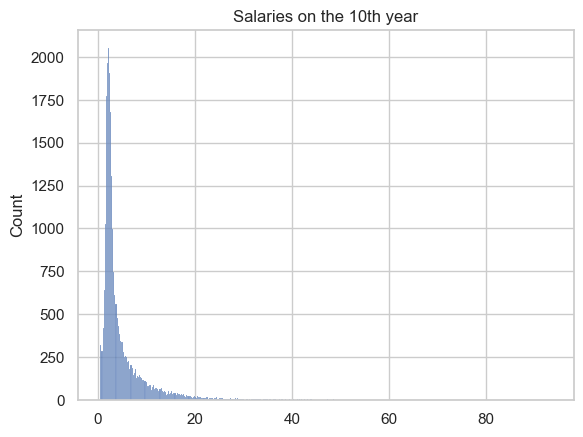

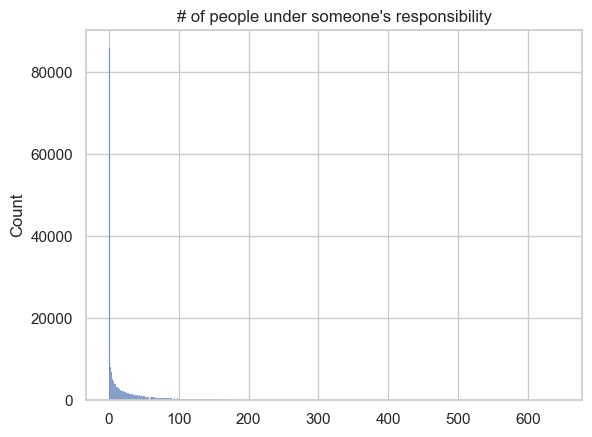

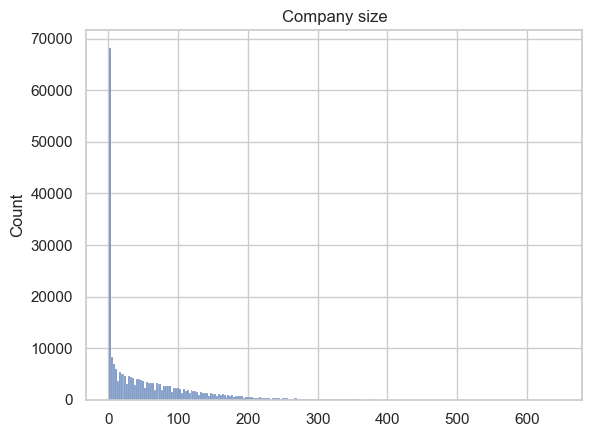

In [9]:
plt.title('Salaries on the 10th year')
sns.histplot(X[:, -1, 0].flatten()) # all the employees, last year, feature #0 = salaries
plt.grid(True)
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten()) # all the employees, all the years, feature #1 = responsabilities
plt.grid(True)
plt.show()

plt.title('Company size')
sns.histplot(X[:, :, 2].flatten()) # all the employees, all the years, feature #2 = company size
plt.grid(True)
plt.show()

✂️ Let's split the dataset in a train and test set (80/20)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## (2) 💻 A Simple RNN

❓ **Question** ❓ Write a model that has: 
- a ***Normalization*** layer adapted to the training set
- a ***SimpleRNN*** layer with 20 *units* (don't forget that `tanh` is better suited as an activation function for a Recurrent Layer)
- a ***Dense*** layer with 10 neurons
- a ***Dense*** layer specific to your task (= to ***predict*** a salary)

In [11]:
def initialize_model():
    normalizer = Normalization()
    normalizer.adapt(X_train)
    model = Sequential()
    model.add(normalizer)
    model.add(SimpleRNN(units=20, activation='tanh'))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="linear"))
    
    return model

In [12]:
model = initialize_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, None, 3)           7         
 on)                                                             
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 708 (2.77 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________


❓ **Question** ❓ Compile your model. For RNN, we recommend you to use the ***rmsprop*** optimizer (instead of *adam*).

In [14]:
def model_compile(model):
    model.compile(
        loss='mse',
        optimizer='rmsprop',
        metrics=['mae']
    )
    return model

model = model_compile(model=model)

❓ **Questions** ❓ 

* Train your model on your training dataset:
    * use a Validation Split of 20%
    * and an Early Stopping Criterion with patience $= 5 $
* Evaluate your performance on the test set

In [15]:
%time
es = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    callbacks=[es],
    verbose=1,
    validation_split=0.2
)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/100


500/500 [==============================] - 6s 7ms/step - loss: 17.4044 - mae: 1.6560 - val_loss: 4.4927 - val_mae: 0.7162
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 2.7713 - mae: 0.5189 - val_loss: 1.7887 - val_mae: 0.4400
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 1.4149 - mae: 0.3925 - val_loss: 1.2314 - val_mae: 0.3447
Epoch 4/100
500/500 [==============================] - 2s 5ms/step - loss: 1.0692 - mae: 0.3599 - val_loss: 1.0481 - val_mae: 0.3254
Epoch 5/100
500/500 [==============================] - 2s 5ms/step - loss: 0.9095 - mae: 0.3515 - val_loss: 0.9207 - val_mae: 0.3400
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 0.8223 - mae: 0.3425 - val_loss: 0.9195 - val_mae: 0.3623
Epoch 7/100
500/500 [==============================] - 2s 5ms/step - loss: 0.7711 - mae: 0.3381 - val_loss: 0.9195 - val_mae: 0.4685
Epoch 8/100
500/500 [======

In [16]:
def plot_history(history):
    plt.plot(history.history['mae'], label = 'Train MAE')
    plt.plot(history.history['val_mae'], label = 'Validation MAE')
    plt.grid(True)
    plt.legend()
    plt.show();

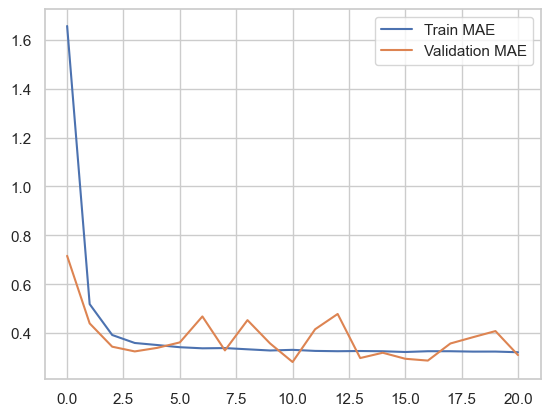

In [17]:
plot_history(history)

In [18]:
mae_model = model.evaluate(X_test, y_test)
print(f'Model Mean Absolute Error {mae_model[1]:.4f}')

157/157 [==============================] - 1s 3ms/step - loss: 0.6522 - mae: 0.2862
Model Mean Absolute Error 0.2862


## (3) 💻 Baseline comparison

❓ **Questions** ❓ 
* Compute the Mean Absolute Error of a baseline model that predicts that the salary remains constant between the 10-th and 11-th year
* Compare this baseline model to your RNN

In [19]:
def const_prediction(X, y):
    errors = []
    for xx, yy in zip(X, y):
        last_sallary = xx[-1][0]
        errors.append(yy- last_sallary)
    return errors

errors_baseline = const_prediction(X,y)
mae_baseline = np.mean(np.abs(errors_baseline))

print(f'Baseline MAE = {mae_baseline:.3f}')
print('vs')
print(f'RNN MAE = {mae_model[1]:.3f}')

Baseline MAE = 0.595
vs
RNN MAE = 0.286


## (4) 💻 LSTM: Long-Short Term Memory

❓ **Questions** ❓ 

* Write the exact same model, but with a `LSTM` layer instead of a `SimpleRNN` layer
* Evaluate your performance on the test set

In [20]:
def initialize_lstm():
    
    normalizer = Normalization() 
    model = Sequential()
    model.add(normalizer)
    model.add(LSTM(units=20, activation='tanh'))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="linear"))
    model = model_compile(model)
    es = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(
        X_train,
        y_train,
        validation_split=0.2,
        batch_size=32,
        epochs=100,
        callbacks=[es],
        verbose=1
    )
    return model, history

In [21]:
lstm_model, lstm_history = initialize_lstm()

Epoch 1/100
500/500 [==============================] - 12s 10ms/step - loss: 22.0904 - mae: 2.1584 - val_loss: 8.6236 - val_mae: 1.1601
Epoch 2/100
500/500 [==============================] - 3s 7ms/step - loss: 5.3422 - mae: 0.8778 - val_loss: 3.3132 - val_mae: 0.6760
Epoch 3/100
500/500 [==============================] - 3s 7ms/step - loss: 2.8831 - mae: 0.6496 - val_loss: 2.6274 - val_mae: 0.6464
Epoch 4/100
500/500 [==============================] - 3s 7ms/step - loss: 2.1394 - mae: 0.5960 - val_loss: 1.9837 - val_mae: 0.5578
Epoch 5/100
500/500 [==============================] - 3s 7ms/step - loss: 1.8006 - mae: 0.5656 - val_loss: 1.7509 - val_mae: 0.5298
Epoch 6/100
500/500 [==============================] - 3s 7ms/step - loss: 1.6815 - mae: 0.5569 - val_loss: 1.5502 - val_mae: 0.5087
Epoch 7/100
500/500 [==============================] - 3s 7ms/step - loss: 1.5448 - mae: 0.5464 - val_loss: 1.6853 - val_mae: 0.5925
Epoch 8/100
500/500 [==============================] - 3s 6ms/step

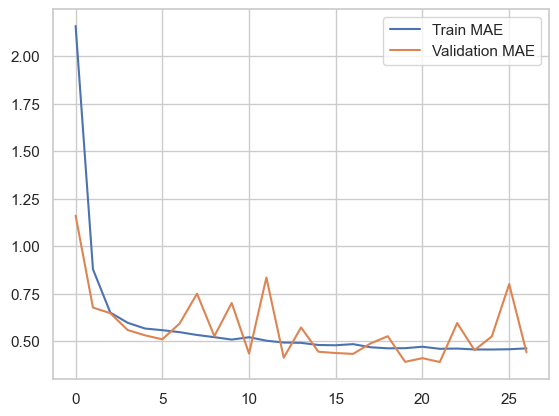

In [22]:
plot_history(lstm_history)

In [23]:
lstm_mae = lstm_model.evaluate(X_test, y_test)
print(f'Baseline MAE = {mae_baseline:.3f}')
print("vs.")
print(f'RNN MAE = {mae_model[1]:.3f}')
print("vs.")
print(f'LSTM MAE = {lstm_mae[1]:.3f}')

157/157 [==============================] - 3s 4ms/step - loss: 0.8252 - mae: 0.3778
Baseline MAE = 0.595
vs.
RNN MAE = 0.286
vs.
LSTM MAE = 0.378
